<a href="https://colab.research.google.com/github/shilpeemaitra/AML/blob/main/lab1_2348557.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the data and getting first impression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Program_1_Dataset.csv')
df.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [ ]:
#removing CHAS
df.drop('CHAS', axis=1, inplace=True)

In [ ]:
df.describe()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Since we are going to perform regression, we will have to standardize the data.

## Standardization

In [ ]:
from scipy.stats import zscore

In [ ]:
df_new = df.copy()
for _ in df.columns[:-1]:
    df_new[_] = zscore(df[_])

In [ ]:
df_new.describe()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000
mean,2.808469e-17,2.808469e-17,-2.808469e-17,-2.387199e-16,-1.404235e-16,-1.544658e-16,-1.404235e-16,0.000000,-5.616939e-17,-4.493551e-16,-5.616939e-17,-3.089316e-16,22.532806
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,9.197104
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-0.982843,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00,5.000000
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-0.637962,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01,17.025000
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-0.523001,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01,21.200000
75%,7.396560e-03,4.877224e-02,1.015999e+00,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01,25.000000
max,9.933931e+00,3.804234e+00,2.422565e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00,50.000000


## Plotting the values once to check for outliers

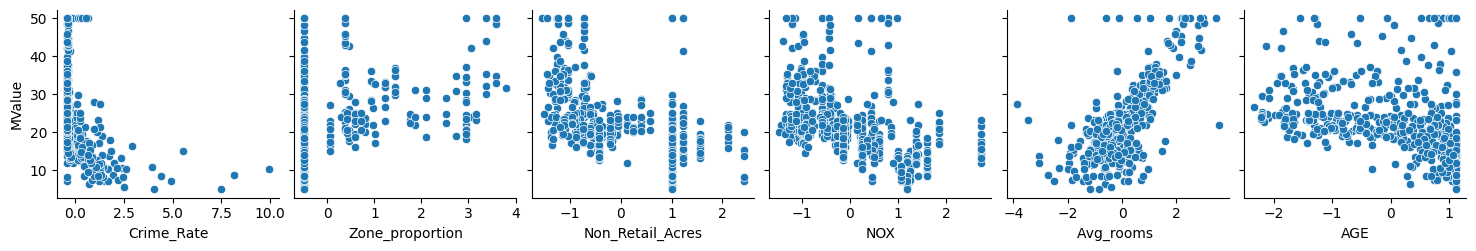

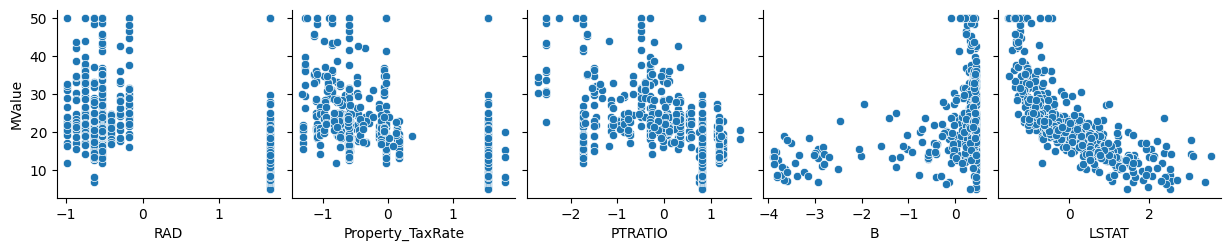

In [ ]:
sns.pairplot(df_new, y_vars='MValue', x_vars=df.columns[:6])
sns.pairplot(df_new, y_vars='MValue', x_vars=df.columns[7:-1])
plt.show()

## Removing the Outliers

In [ ]:
df_new.drop(df_new[df_new.iloc[:,:-1].applymap(lambda x: True if abs(x)>=3 else False).any(axis=1)].index, inplace=True)
df_new.describe()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
count,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000
mean,-0.140211,-0.088705,-0.022504,-0.034281,-0.009534,-0.012085,-0.003272,-0.095749,-0.089967,-0.026296,0.191449,-0.059146,22.768750
std,0.554409,0.826709,0.983557,0.982235,0.889105,0.986407,0.917620,0.939419,0.955642,0.988614,0.567541,0.908572,8.489141
min,-0.419782,-0.487722,-1.557842,-1.465882,-2.730550,-2.335437,-1.267069,-0.982843,-1.308051,-2.707379,-2.995726,-1.531127,5.600000
25%,-0.410905,-0.487722,-0.867691,-0.878475,-0.565425,-0.814334,-0.767088,-0.637962,-0.779455,-0.534275,0.230290,-0.766129,17.800000
50%,-0.394376,-0.487722,-0.375976,-0.230601,-0.129123,0.246260,-0.203645,-0.523001,-0.577519,0.113032,0.389684,-0.198775,21.450000
75%,-0.167187,0.048772,1.015999,0.512296,0.436110,0.897019,0.628275,-0.178120,0.170831,0.806576,0.441052,0.497538,25.000000
max,2.914251,2.945843,2.422565,2.732346,2.978058,1.117494,2.580236,1.661245,1.798194,1.268938,0.441052,2.710532,50.000000


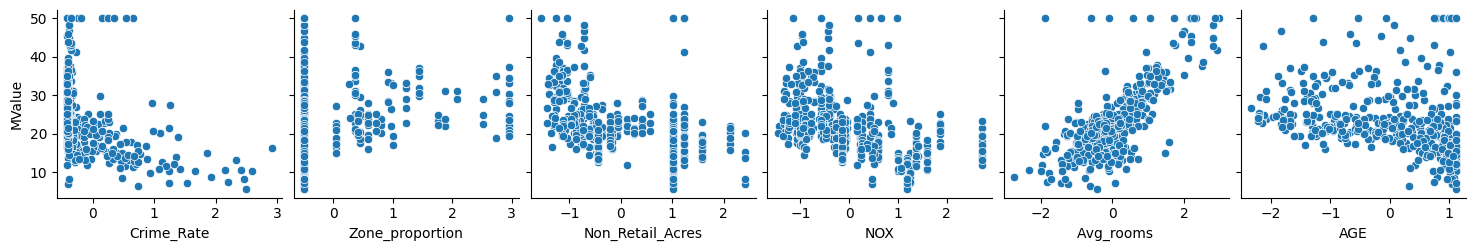

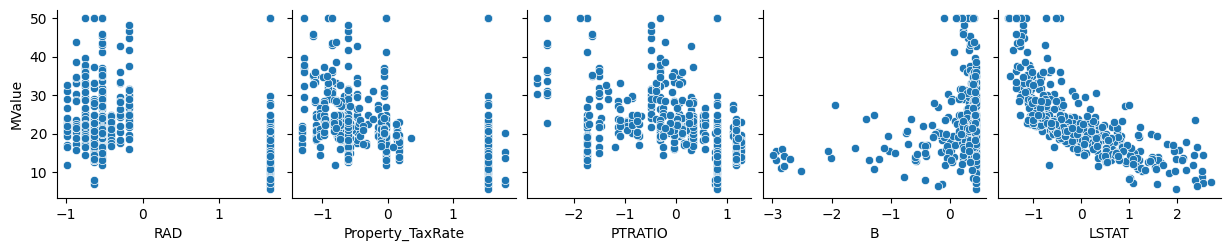

In [ ]:
sns.pairplot(df_new, y_vars='MValue', x_vars=df.columns[:6])
sns.pairplot(df_new, y_vars='MValue', x_vars=df.columns[7:-1])
plt.show()

## Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split

X, y = df_new['Avg_rooms '], df_new['MValue']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3)

## Custom Implementation of SLR

In [ ]:
def lin_reg(x, y):
    b1 = np.cov(x, y)[0][1]/np.var(x)
    b0 = np.mean(y) - b1 * np.mean(x)
    return b0, b1

b0, b1 = lin_reg(X_train.values, y_train.values)
print('Using our custom implementation, we get:')
print(f'b0 - {b0}\nb1 - {b1}')

Using our custom implementation, we get:
b0 - 22.526348689474094
b1 - 6.967641689363255


## Checking to see if the coefficients are accurate

In [ ]:
from sklearn.linear_model import LinearRegression

X_train = np.expand_dims(X_train, axis=1)

lr = LinearRegression()
lr.fit(X_train, y_train)

print('Using the implementation from scikit-learn, we get:')
print(f'b0 - {lr.intercept_}\nb1 - {lr.coef_[0]}')

Using the implementation from scikit-learn, we get:
b0 - 22.52633698026194
b1 - 6.945380853295


Therefore, the coefficients we got are indeed the correct ones.

## Evaluating the model

In [ ]:
#mse
y_pred = lr.predict(np.expand_dims(X_test, axis=1))
mse = (1/len(y_test))*np.sum((y_test-y_pred)**2)
print(f'The mean squared error is: {mse}')

The mean squared error is: 53.207807811052426


In [ ]:
#r-squared
rss = np.sum((y_test-y_pred)**2)
tss = np.sum((y_test-np.mean(y_test))**2)
r2 = 1-rss/tss
print(f'The R-squared value is: {r2}')

The R-squared value is: 0.4020401159727591


Thus, we can conclude that for the given dataset, approximately 40% of the variability in `MValue` can be explained by the predictor `Avg_rooms `. This value is not a lot but still the linear model thus created is decent enough. We will plot the predictions below.

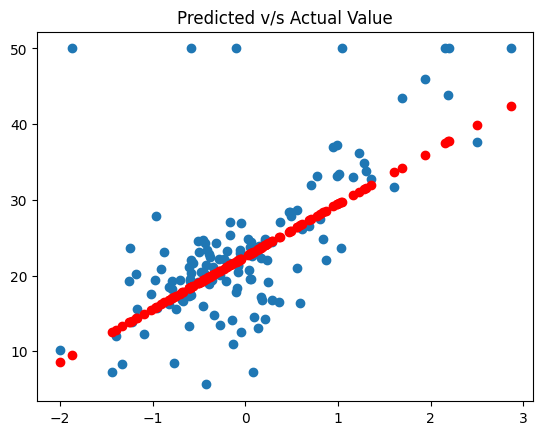

In [ ]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, c='r')
plt.title('Predicted v/s Actual Value')
plt.show()